<a href="https://colab.research.google.com/github/RoopamSeal/Wine_Quality/blob/main/WineQualityProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install pandas numpy matplotlib scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import seaborn as sns

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
dataset = pd.read_csv(url, delimiter=';')

print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
print(dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


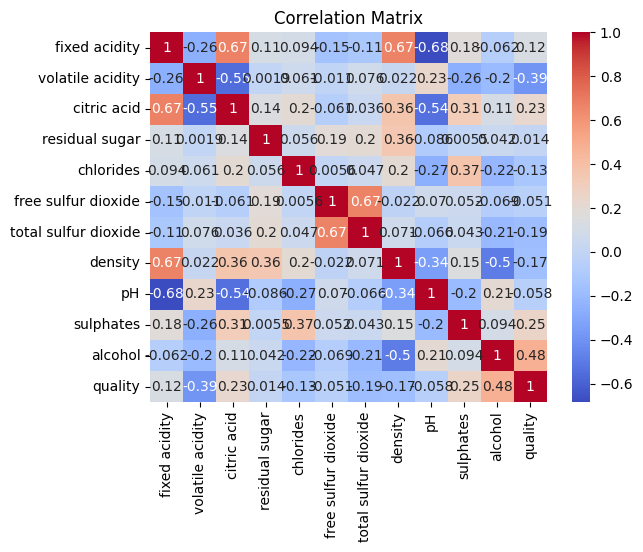

In [ ]:
corr = dataset.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()


In [ ]:
# to find the missing values
missing_values = dataset.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


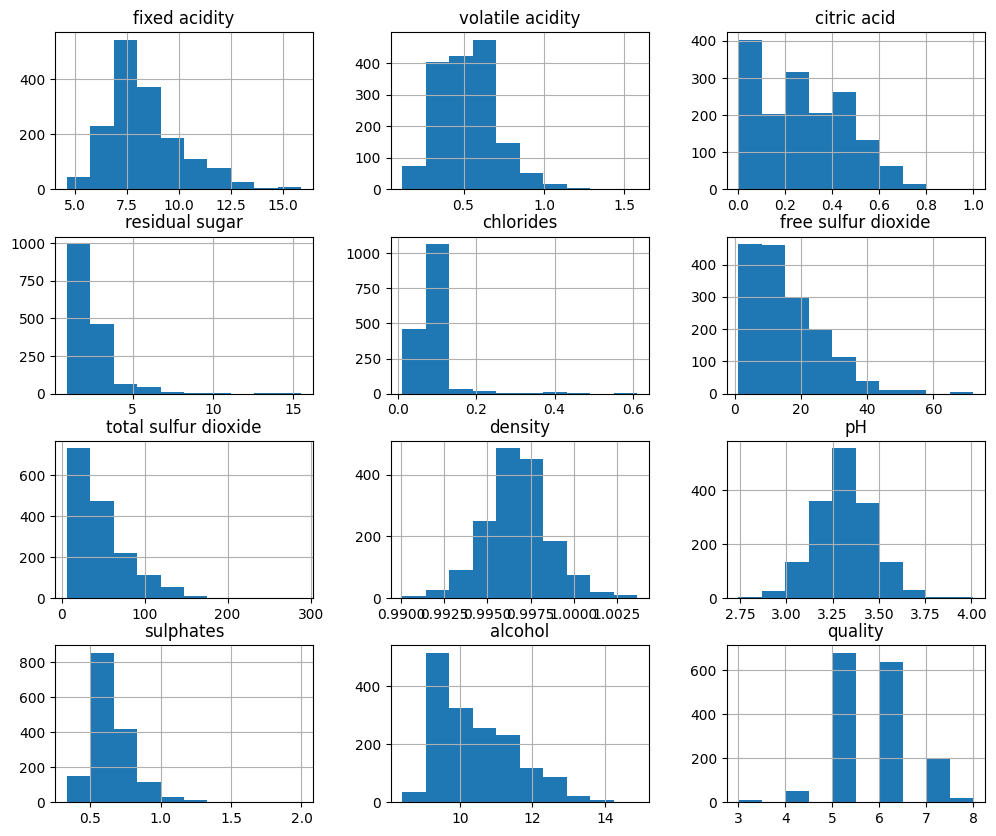

In [ ]:
# using hist() to generate histograms of the values in each column
dataset.hist(figsize=(12,10))
plt.show()

In [ ]:
a = dataset['quality'].mode()
print("The most common quality rating in the dataset is:", a[0])

The most common quality rating in the dataset is: 5


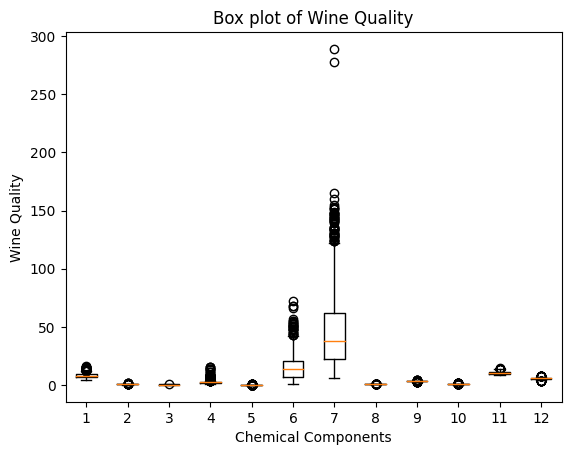

In [ ]:
# to create a box plot of the wine quality data
fig, ax = plt.subplots()
ax.boxplot(dataset)

# to set the plot title and axis labels
ax.set_title('Box plot of Wine Quality')
ax.set_xlabel('Chemical Components')
ax.set_ylabel('Wine Quality')

plt.show()


In [ ]:
# to compute the z-score for each data point
z_scores = stats.zscore(dataset)

# to identify data points with z-score > 3 or < -3
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

# to create a new dataframe with outliers removed
df = dataset[filtered_entries]


In [ ]:
# to split the dataset into features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# to split the data into training and testing sets with a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# to print the number of samples in the training and testing sets
print("Number of samples in training set:", len(X_train))
print("Number of samples in testing set:", len(X_test))

Number of samples in training set: 1160
Number of samples in testing set: 291


In [ ]:
# create a linear regression model
lr_model = LinearRegression()

# training the model on the training set
lr_model.fit( X_train, y_train)

# to make predictions on the testing set
y_pred = lr_model.predict(X_test)

# to evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = lr_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2_score)


Mean Squared Error (MSE): 0.4325126159970887
Root Mean Squared Error (RMSE): 0.6576569135933178
R-squared (R^2) Score: 0.33630036178512857


                      Coefficient
fixed acidity            0.013432
volatile acidity        -0.725269
citric acid             -0.110291
residual sugar           0.005528
chlorides               -1.122850
free sulfur dioxide      0.005201
total sulfur dioxide    -0.004157
density                 -9.030400
pH                      -0.670366
sulphates                1.341845
alcohol                  0.292522


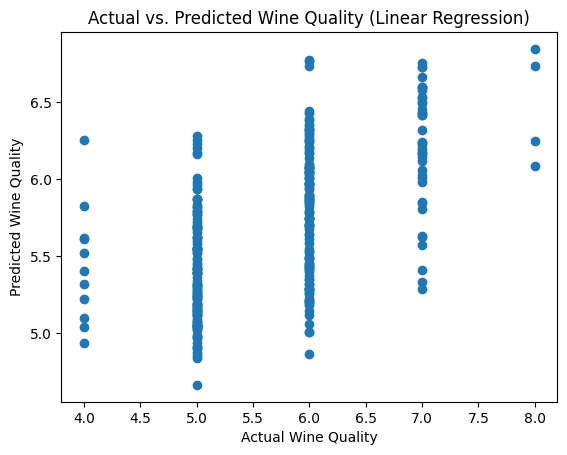

In [ ]:
# using the linear regression model to predict wine quality
lr_model.fit(X_train, y_train)
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# predicting the wine quality using the testing set
y_pred = lr_model.predict(X_test)

# to plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs. Predicted Wine Quality (Linear Regression)")
plt.show()

Mean Squared Error (MSE): 0.37142817869415806
Root Mean Squared Error (RMSE): 0.6094490780156764
R-squared (R^2) Score: 0.4300357060017397


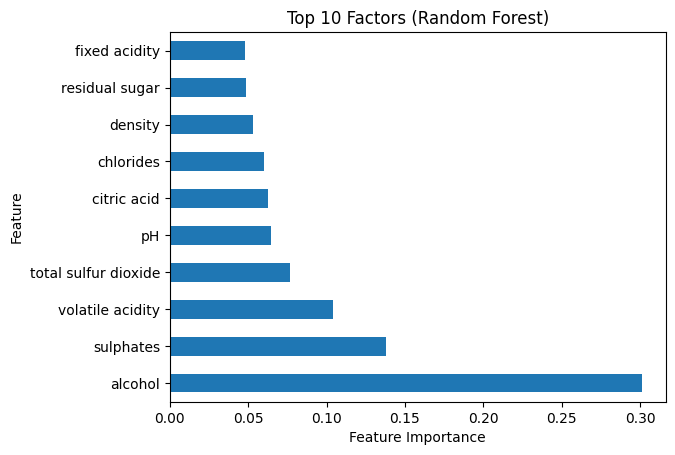

In [ ]:
# to create a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# to train the model on the training set
rf_model.fit(X_train, y_train)

# makeing predictions on the testing set
y_pred = rf_model.predict(X_test)

# evaluating the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = rf_model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2_score)

# Display feature importances in a bar chart
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Factors (Random Forest)")
plt.show()

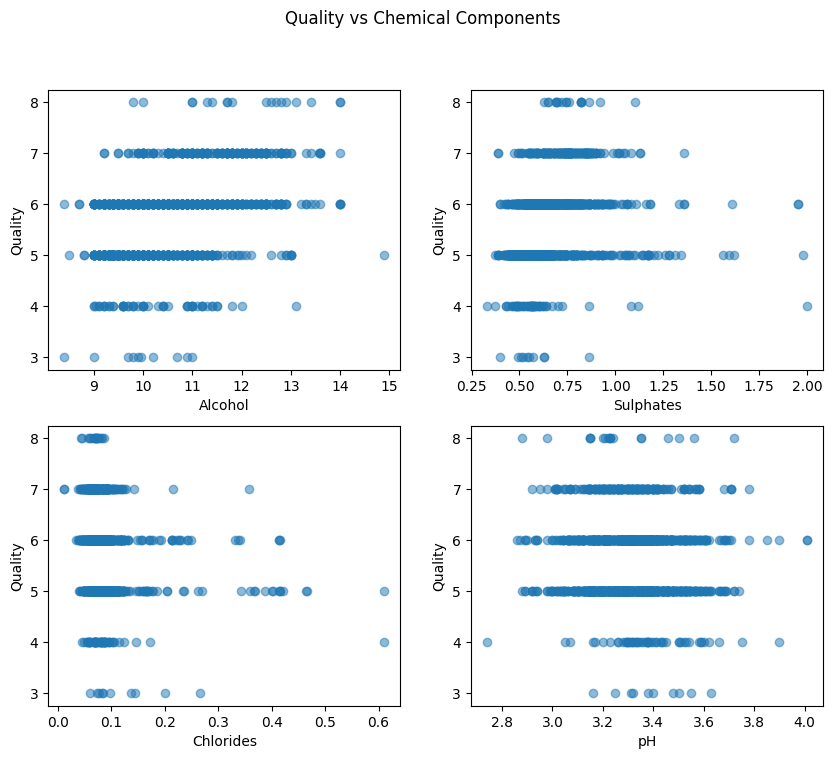

In [ ]:
# to create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# to plot the quality vs alcohol in the first subplot
axs[0, 0].scatter(dataset['alcohol'], dataset['quality'], alpha=0.5)
axs[0, 0].set_xlabel('Alcohol')
axs[0, 0].set_ylabel('Quality')

# to plot the quality vs sulphates in the second subplot
axs[0, 1].scatter(dataset['sulphates'], dataset['quality'], alpha=0.5)
axs[0, 1].set_xlabel('Sulphates')
axs[0, 1].set_ylabel('Quality')

# to plot the quality vs chlorides in the third subplot
axs[1, 0].scatter(dataset['chlorides'], dataset['quality'], alpha=0.5)
axs[1, 0].set_xlabel('Chlorides')
axs[1, 0].set_ylabel('Quality')

# to plot the quality vs pH in the fourth subplot
axs[1, 1].scatter(dataset['pH'], dataset['quality'], alpha=0.5)
axs[1, 1].set_xlabel('pH')
axs[1, 1].set_ylabel('Quality')

# to set the overall title for the figure
fig.suptitle('Quality vs Chemical Components')

# to display the plot
plt.show()